<a href="https://colab.research.google.com/github/ViditPy/Bank_Marketing_Solutions-Python-ML/blob/master/bank_maketing_Solutions_Cube_datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## ABOUT THE DATASET

 
 The dataset consists of direct marketing campaigns data of a "PORTUGUESE BANKING INSTITUTION. There were four variants of the datasets out of which we chose “ bank1.csv” which consists of 45211 data points with 17 independent variables out of which 10 are numeric features and 10 are categorical features. The list of features available to us are given below:
bank client data:


age (numeric)


job : type of job (['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student']
       

marital : marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)

education (categorical: ['tertiary', 'secondary', 'unknown', 'primary']

default: has credit in default? (categorical: ‘no’,’yes’,’unknown’)
housing: has housing loan? (categorical: ‘no’,’yes’,’unknown’)

loan: has personal loan? (categorical: ‘no’,’yes’,’unknown’)
Related with the last contact of the current campaign:

 contact: contact communication type (categorical: ‘cellular’,’telephone’,unknown)

 month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)

 day: (1st to 31 st of the month )


 duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). 
Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
other attributes:

 campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

 pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

 previous: number of contacts performed before this campaign and for this client (numeric)

 poutcome: outcome of the previous marketing campaign (categorical: ['unknown', 'failure', 'other', 'success'])



In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline    

In [ ]:
df = pd.read_csv('bank1.csv') 

In [ ]:
df.shape 

(45211, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are 17 columns & 45211 rows in this dataset

In [ ]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211,NaN,NaN,NaN,40.9362,10.6188,18,33,39,48,95
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211,NaN,NaN,NaN,1362.27,3044.77,-8019,72,448,1428,102127
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211,NaN,NaN,NaN,15.8064,8.32248,1,8,16,21,31


Mean Age : 40 , Max Age : 95

Mean Balance : 1362           Max balance : 102127

Rest,we will do deep analysis on each entities

In [ ]:
df.duplicated().any()  ## No duplicates value, Hence we hv all unique values

False

In [ ]:
df.apply(lambda x: len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [ ]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [ ]:
loans_counts=df['loan'].value_counts().to_frame()
loans_counts

,loan
no,37967
yes,7244


37967 People doesn't have any Loan while 7244 people already have Loan

In [ ]:
7244/37967*100     ## 19.97 or 20 % People has Taken Loan

19.079727131456263

In [ ]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
#Crosstab to display education stats with respect to Loan 
pd.crosstab(index=df["education"],columns=df['loan'])

loan,no,yes
education,,
primary,5827,1024
secondary,18899,4303
tertiary,11517,1784
unknown,1724,133


Primary Education: 1024 Loans

Secondary Education: 18899 Loans

Tertiary Education: 1784 Loans

Unknown : 133


# Now we will calculate how many % People from each Education group has taken Loan

In [ ]:
1024/(1024+5827)*100    ## Primary Education : 15 % people has taken Loan

14.946723106115895

In [ ]:
4303/(18899+4303)*100   ## 23.15 % people from Secondary Education has taken Loan

18.5458150159469

In [ ]:
1784/(11517+ 1784)*100         ## 13 % people from Tertiary Education

13.412525374032027

In [ ]:
133/(133+1784)*100      ## 7 % approx

6.9379238393322895

Maximum, Secondary Education has Taken Loan

In [ ]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


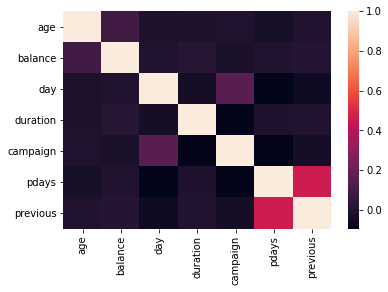

In [ ]:
sns.heatmap(df.corr())

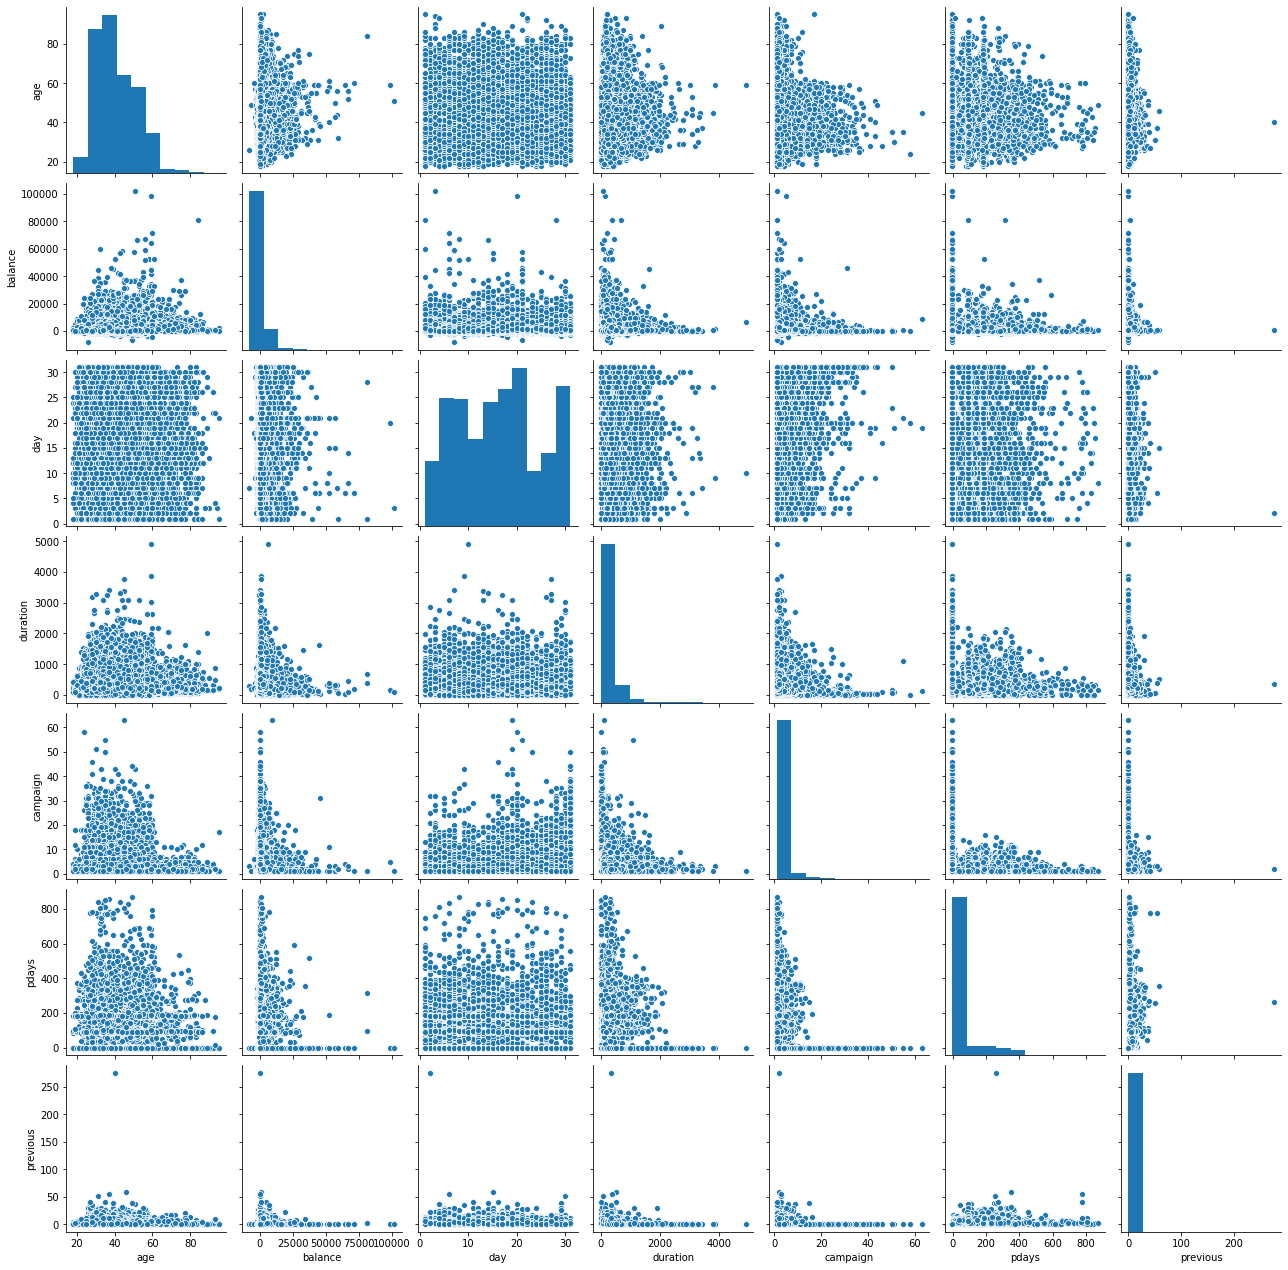

In [ ]:
sns.pairplot(df)

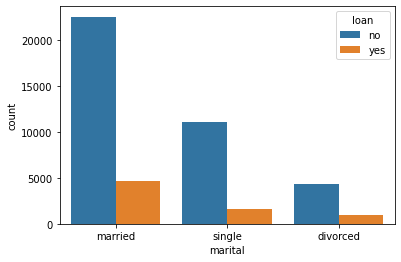

In [ ]:
sns.countplot(x="marital", data=df,hue="loan")

# "Married People" are more likely to take Loans , as compared to Single & divorced

In [ ]:
5000/20000*100     # Around 25% married people likely to take Loans

25.0

In [ ]:
df.groupby(["loan"]).count()  


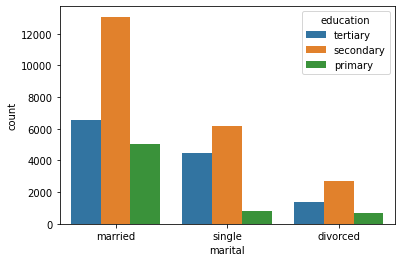

In [ ]:
sns.countplot(x="marital", data=df,hue="education")

Married People with "Secondary Education "are more likely to take loan

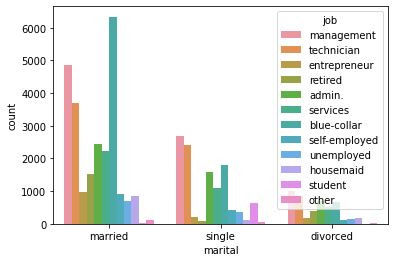

In [ ]:
sns.countplot(x="marital", data=df,hue="job")

Most Married people have blue Collar jobs or in Management


In [ ]:
import plotly.express as px



In [ ]:
df[['age']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,40841.0,40.790676,10.475473,18.0,33.0,39.0,48.0,95.0


Mean Age : 40

In [ ]:
px.histogram(df , x = 'age')

We can see that age is **right skewed** and the average value of age from our targeted user is 40. 

In [ ]:
df[['job']].describe().T

,count,unique,top,freq
job,45211,12,blue-collar,9732


## There are 12 types of job people are doing. Maximum people falls in "Blue-Collar" Category ie , 9732

In [ ]:
9732/45211*100   ## Around 22 % people are Blue-Collar guy

21.525734887527374

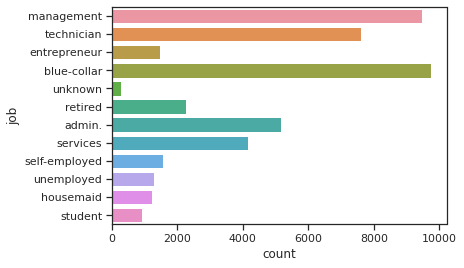

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=df)                     ##   THROUGH VISUALISATION

In [ ]:
px.histogram(df , x = 'job')

We can observer that most of our targeted users are either Management or blue-collar workers. 

We've also observed targeting retired , unemployed,housemaid and students , We would study the conversion rate.  


### Marital Status 

We look at the distribution of Marital status 

In [ ]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df.marital.value_counts()


married     23248
single      10508
divorced     4520
Name: marital, dtype: int64

'married', 'single', 'divorced'] - 3 types of Statuses

In [ ]:
df[['marital']].describe().T

,count,unique,top,freq
marital,45211,3,married,27214


In [ ]:
23248/45211*100

51.421114330583265

51 % People are Married

# EDUCATION

We look at the distribution of education among our targeted users. 

In [ ]:
df[['education']].describe().T

,count,unique,top,freq
education,45211,4,secondary,23202


Most people are " Secondary educated"

In [ ]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
23202/45211*100    ## Around 51 % are Secondary educated

51.3193691800668

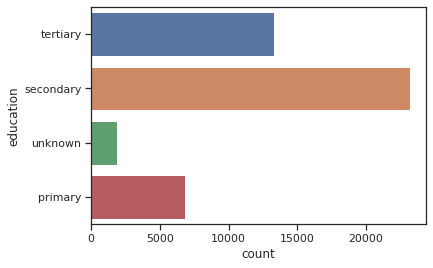

In [ ]:
sns.countplot(y='education', data=df)


### Default , Housing Loan , Personal Loans 

Here we look whether our targeted users are defaulters , or have a personal/housing loan. 

In [ ]:
df[['default','housing','loan']].describe().T

,count,unique,top,freq
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967


## Default

In [ ]:
px.histogram(df , x='default')

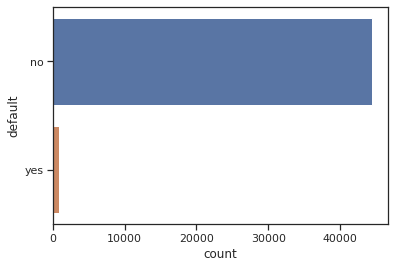

In [ ]:
sns.countplot(y ='default',data = df)

In [ ]:
df.default.value_counts()     # 815 people are defaulters

no     44396
yes      815
Name: default, dtype: int64

In [ ]:
815/45211*100      #  2 %  people are "Defaulters"

1.8026586450200173

## Housing Loan

In [ ]:
px.histogram(df , x='housing')

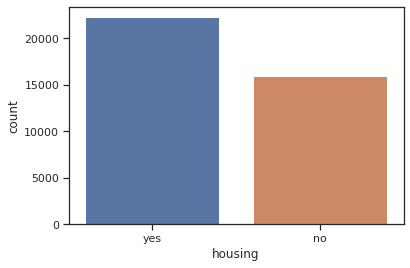

In [ ]:
sns.countplot(data = df1, x = 'housing')

In [ ]:
df.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [ ]:
25130/45211*100

55.583818097365686

## 56 % People have housing Loans

## Personal Loan

In [ ]:
px.histogram(df , x='loan')

In [ ]:
df.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [ ]:
7244/45211*100      

16.022649355245406

# Personal Loan Count = 16 %

# We can see most of the people do not have a personal loan But have a  "Housing loan" . We're also observing the most of our targeted customers are not defaulters

# Hence, bank should be more focussed towards "Housing Loans" & Should put more schemas and Marketing Campaigns in the same.

In [ ]:
px.box(df1,x='balance',y='age')

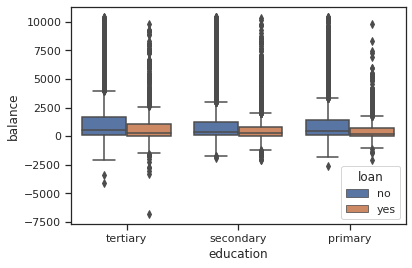

In [ ]:
sns.boxplot(x=df['education'],y=df['balance'],hue=df['loan'])


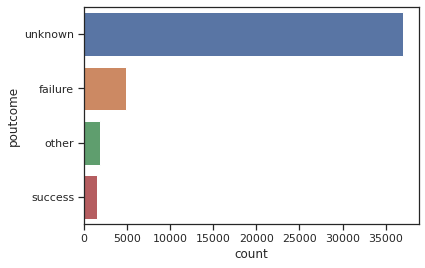

In [ ]:
sns.countplot(y = 'poutcome',data =df)

 # poutcome: This feature denotes the outcome of the previous marketing campaign.

#Here ,We found most Campaigns to be failure.

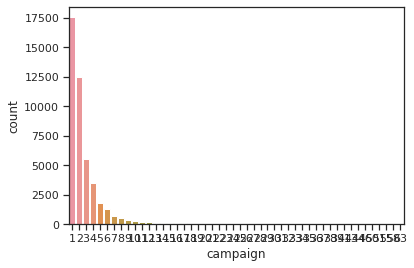

In [ ]:
sns.countplot(x = 'campaign',data =df)

Hence,maximum number of Campaigns ,were in the first Year. Since, the Campaigns were failurre, the bank keep on decreasing the Marketing campaigns. 

#Therefore,we infer that Bank has Lost huge money due to Marketing Failure

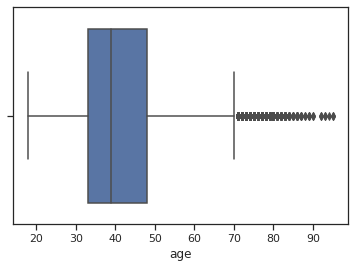

In [ ]:
sns.boxplot(x ='age', data = df)

We find that maximum people falls in Age between  30 to 50

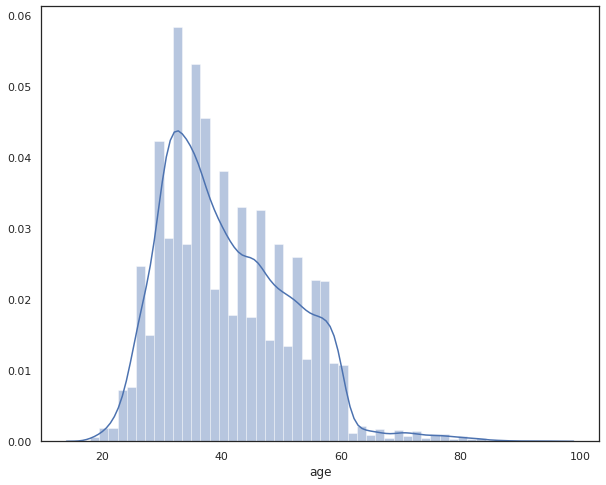

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df['age'])

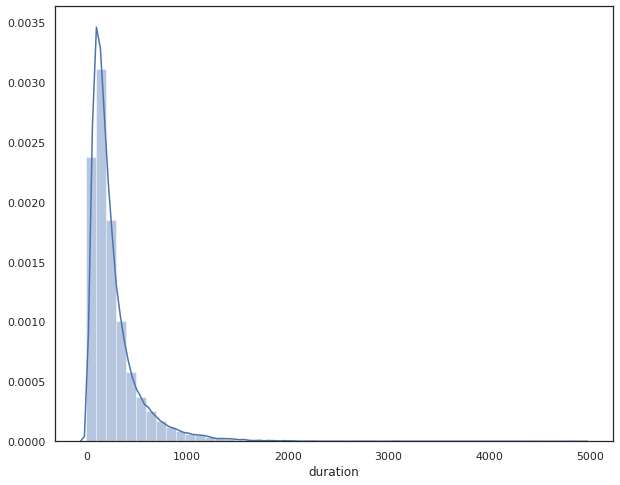

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df['duration'])

# This gives us the insights on the (last contract duration),which we found Upto 20 max

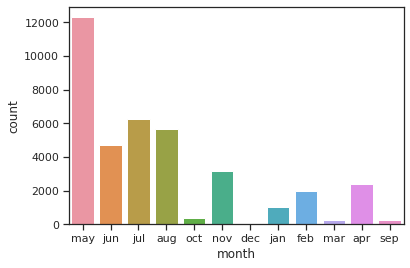

In [ ]:
sns.countplot(data = df1, x='month')

# Hence,we find that "May to August" is the Peak season ,for contracts & business. 

Hence, we can also say that,maximum Marketing Campaigns should be done in these Months.

Maximum,schemas should be offered to "Secondary Education Class" & Target Age is : 30 to 45 years as most Customer falls in this Age which are in need of Loan.

Also,People are more likely to take "Housing Loans as Stated Earlier",bank should put more schemas on housing loans.


Married People are more likely to take Loans,so bank should bring up the policy accordingly.








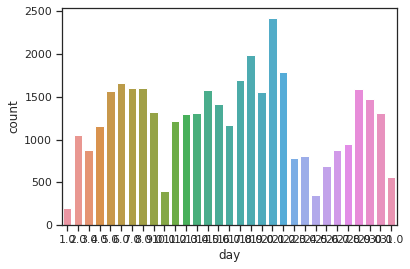

In [ ]:
sns.countplot(data = df, x='day')

# Very Nice imformation we got, as we know the an Average Sales cycle for conversion is 20 days. Here, we see that in between 15th to 21st,there is maximum Conversion.

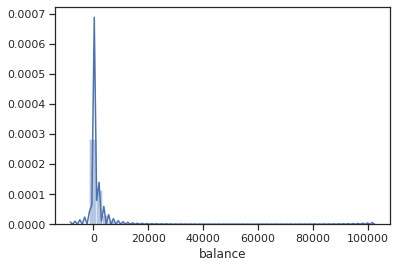

In [ ]:
sns.distplot(df['balance'])

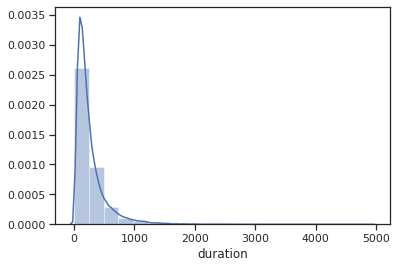

In [ ]:
sns.distplot(df.duration, bins = 20) 


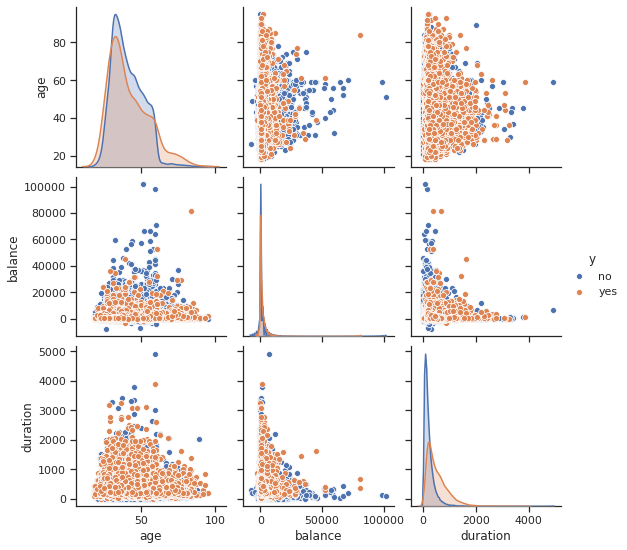

In [ ]:
sns.pairplot(data=df, hue='y', vars= ['age', 'balance', 'duration'])


Comparing we found that,that the age group between 30 to 40 have been contacted for more duration .

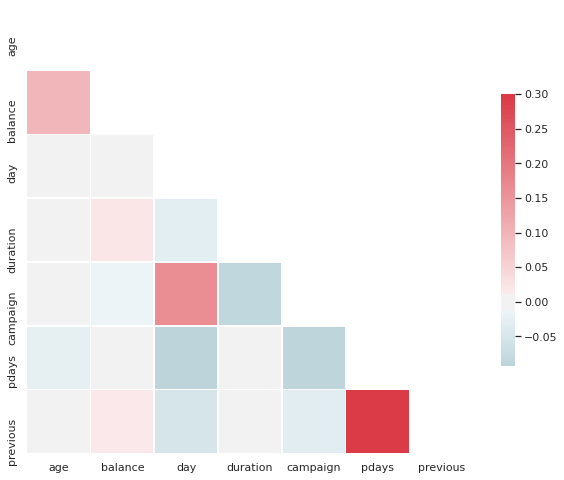

In [ ]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr1= df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



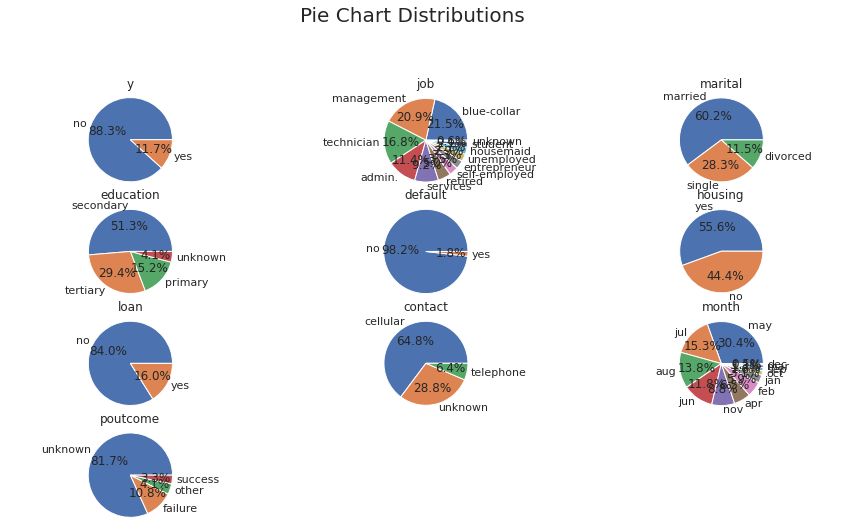

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



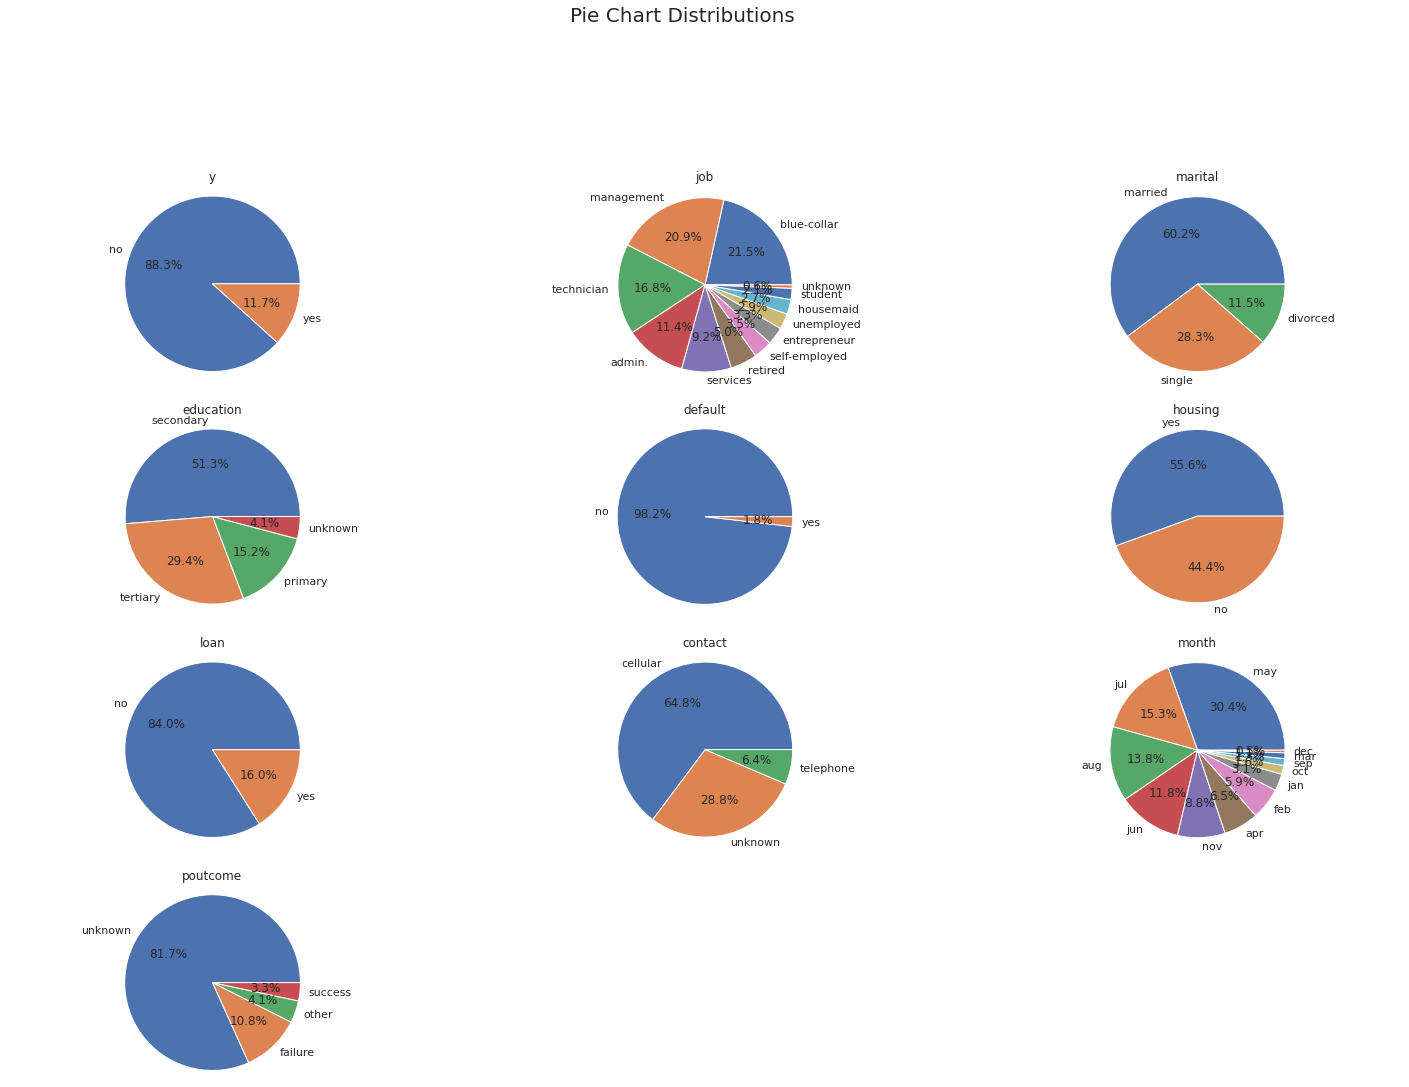

In [ ]:
df.columns
df2 = df[['y','job','marital', 'education', 'default', 'housing','loan', 'contact',
             'month', 'poutcome'
                    ]]
fig = plt.figure(figsize=(25, 25))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, df2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])
   
    values = df2.iloc[:, i - 1].value_counts(normalize = True).values
    index = df2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[10, 10, 10, 10])


## Through the above pie-chart ,we get the clear picture of each dataset distribution. Rest ,being analysed above.